In [2]:
# %pip install geopandas

import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

df_ridership1 = pd.read_csv("/data/Disaggregate_Bus_Ridership.csv")
# df_redesign_may22 = pd.read_csv("Bus_Network_Redesign_Draft_Bus_Routes.csv")
df_redesign_nov22 = pd.read_csv("/data/Bus_Network_Redesign_Draft_Bus_Routes_November_2022.csv")
df_busroutes = pd.read_csv("/data/MBTA_Bus_Routes_and_Stops.csv")
df_busroutes_geo = gpd.read_file("/data/MBTA_Bus_Routes_and_Stops.geojson")
df_pati = pd.read_csv("/data/PATI_Bus_Stops.csv")
df_neighborhoods= gpd.read_file("/data/census2020_bg_neighborhoods.geojson")


""" Data Sources:
df_ridership1: https://mbta-massdot.opendata.arcgis.com/datasets/eec03d901d2e470ebd5758c60d793e8e_0/explore?showTable=true
df_redesign_may22: https://mbta-massdot.opendata.arcgis.com/datasets/b22ae539e9bc4eb287e4564f91c23bd2_0/explore?location=42.258010%2C-71.237474%2C9.50
df_redesign_nov22: https://mbta-massdot.opendata.arcgis.com/datasets/c3cbfd5bf9084104924939b2828360be_0/explore?filters=eyJyb3V0ZV9udW0iOlsiNjUiXX0%3D&location=42.338291%2C-71.091772%2C14.90
df_busroutes/ df_busroutes_geo: https://geo-massdot.opendata.arcgis.com/datasets/massgis::mbta-bus-routes-and-stops/explore?filters=eyJUT1dOIjpbIkJPU1RPTiJdfQ%3D%3D&layer=0&location=42.264617%2C-71.190638%2C12.60
df_pati: https://mbta-massdot.opendata.arcgis.com/datasets/24a97982b39f4febb504c9e6cb55879b_0/explore?location=42.359130%2C-71.069726%2C12.56

"""
#change to lowercase for consistency
df_ridership1.columns = df_ridership1.columns.str.lower()
df_redesign_nov22.columns = df_redesign_nov22.columns.str.lower()
df_busroutes.columns = df_busroutes.columns.str.lower()
df_busroutes_geo.columns = df_busroutes_geo.columns.str.lower()
df_pati.columns = df_pati.columns.str.lower()
df_neighborhoods.columns = df_neighborhoods.columns.str.lower()


print("DATASET: df_ridership1")
print(df_ridership1.head())
print()
print("DATASET: df_redesign_nov22")
print(df_redesign_nov22.head())
print()
print("DATASET: df_busroutes")
print(df_busroutes.head())
print()
print("DATASET: df_busroutes_geo")
print(df_busroutes_geo.head())
print()
print("DATASET: df_pati")
print(df_pati.head())
print()
print("DATASET: df_neighborhoods")
print(df_neighborhoods.head())

""" 
    dtype warning- cleaning data
# # Function to apply to each column to find out the types present
# def check_column_types(data, column_name):
#     return {type(x) for x in data[column_name]}

# # Check types in the specific columns mentioned in the dtype warnings
 
# types_in_column1 = check_column_types(df_ridership1, 'route_id') 


# print("Types in column 'route_id' of df_ridership1:", types_in_column1)

# unique_route_ids = df_ridership1['route_id'].unique()
# print(unique_route_ids)
"""

df_ridership1['route_id'] = df_ridership1['route_id'].astype(str)
# Rename 'route_num' in df_redesign_nov22 for clarity and consistency
df_redesign_nov22.rename(columns={'route_num': 'route_id'}, inplace=True)



/var/folders/xm/zvlqxssx0438vv_w32qrlddm0000gn/T/ipykernel_6453/1276545029.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/var/folders/xm/zvlqxssx0438vv_w32qrlddm0000gn/T/ipykernel_6453/1276545029.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ridership1 = pd.read_csv("Disaggregate_Bus_Ridership.csv")


DATASET: df_ridership1
      season route_id route_variant  direction_id trip_start_time  \
0  Fall 2016        1         1-_-0             0        05:34:00   
1  Fall 2016        1         1-_-0             0        05:34:00   
2  Fall 2016        1         1-_-0             0        05:34:00   
3  Fall 2016        1         1-_-0             0        05:34:00   
4  Fall 2016        1         1-_-0             0        05:34:00   

   day_type_id day_type_name                      stop_name  stop_id  \
0  day_type_02      saturday  MASSACHUSETTS AVE @ SIDNEY ST      101   
1  day_type_02      saturday  MASSACHUSETTS AVE @ ST BOTOLP       89   
2  day_type_02      saturday  MASSACHUSETTS AVE @ TREMONT S       87   
3  day_type_02      saturday  MASSACHUSETTS AVE @ TROWBRIDG      108   
4  day_type_02      saturday  MASSACHUSETTS AVE @ WASHINGTO    10590   

   stop_sequence  boardings  alightings  load  sample_size  objectid  
0             19        0.0         1.0   5.0            1

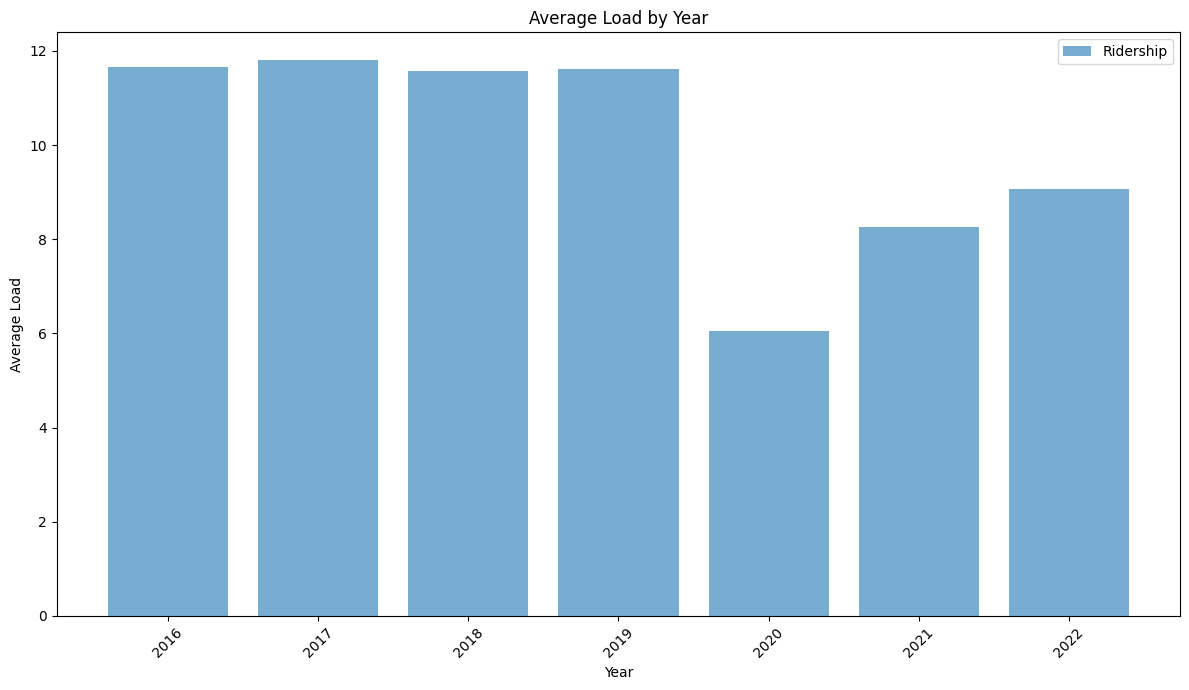

In [3]:

"""
Seeing if the November 2022 Bus Network Redesign approval had much impact on ridership.
In an attempt to see the effect of past and ongoing solutions and projects to bus infrastructure, 
I plotted the average load by year. I mainly wanted to see if there were any changes before 2022 and after 2022 
(when there were changes to the bus network infrastructure).
There is a notable consistency in ridership levels from 2016 to 2019, with the average load hovering just above 10. 
This suggests a stable demand for bus services during these years.
The sharp decline in 2020 is striking and most likely reflects the impact of the COVID-19 pandemic, 
when restrictions and lockdowns led to a decrease in public transport use due to health concerns and the rise of remote working.
In 2021, there is an increase in the average load, indicating a recovery phase as restrictions may have eased and people started returning to pre-pandemic activities.

The graph revealed that there was a very slight increase from 2021 to 2022 in the average load. 
This could suggest that the network redesign in infrastructure helped with ridership.
However, the change is quite minimal and  the average load hasn't returned to the pre-2020 levels, 
which could suggest a lasting change in commuting patterns, 
possibly due to the sustained adoption of remote work, increased use of alternative transportation, or lingering health concerns.

Limitations:
- The most recent data on ridership for the MBTA buses is 2022, so we cannot see the most recent ridership data.
- COVID-19 heavily affected public transport use, and lingering affects of it could still have been present in 2022, affecting ridership.
- The Bus Network Redesign project is still ongoing.
"""


# Extract year from the 'season' column for both datasets
df_ridership1['year'] = df_ridership1['season'].str.extract('(\d{4})').astype(int)

# Calculate the average load by year for both datasets
average_load_by_year = df_ridership1.groupby('year')['load'].mean()

# Plotting the results
plt.figure(figsize=(12, 7))
plt.bar(average_load_by_year.index.astype(str), average_load_by_year.values, label='Ridership', alpha=0.6)
plt.title('Average Load by Year')  
plt.xlabel('Year')  
plt.ylabel('Average Load')  
plt.xticks(rotation=45)  
plt.legend()
plt.tight_layout() 
plt.show()


Top 10 High Load Stops with Names from df_ridership1:
      route_id  stop_id                     stop_name  average_load1
6241        35     1320  TREMONT ST @ SAINT ALPHONSUS      51.700000
6639        36      521        ARBORWAY @ SHEA SQUARE      48.533333
11369       57    11520          PARK DR @ FENWAY STA      46.000000
6282        35     6574   S HUNTINGTON AVE @ HEATH ST      45.025000
6981        38     6574   S HUNTINGTON AVE @ HEATH ST      42.012500
6713        36     1327   HUMBOLDT AVE @ HOMESTEAD ST      39.814286
6714        36     1328    HUMBOLDT AVE @ CRAWFORD ST      39.814286
6716        36     1331     HUMBOLDT AVE @ WYOMING ST      39.814286
6638        36      520         ARBORWAY @ COURTHOUSE      39.814286
6715        36     1330    HUMBOLDT AVE @ WAUMBECK ST      39.800000

Top 10 High Activity Stops with Names from df_ridership1:
      route_id  stop_id                      stop_name  average_boardings1  \
5490        32     1346     HUMBOLDT AVE @ TOWNSEN

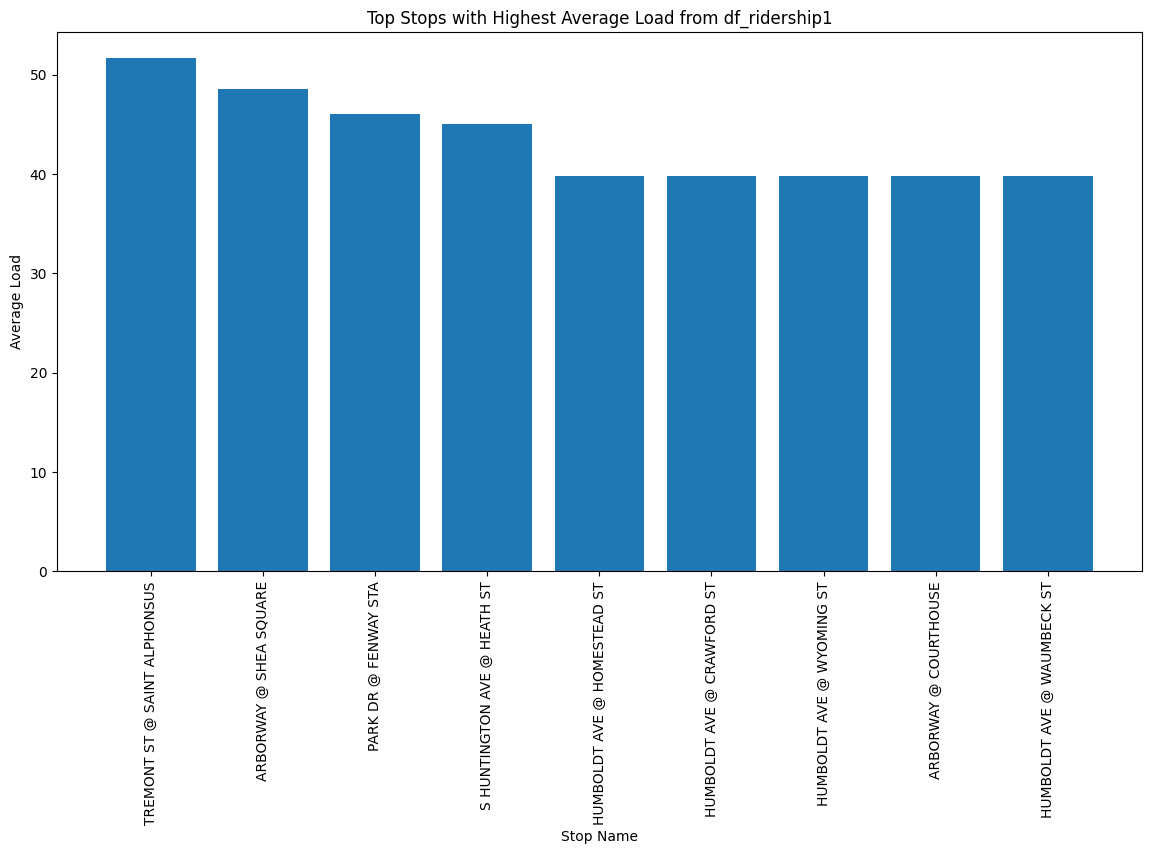

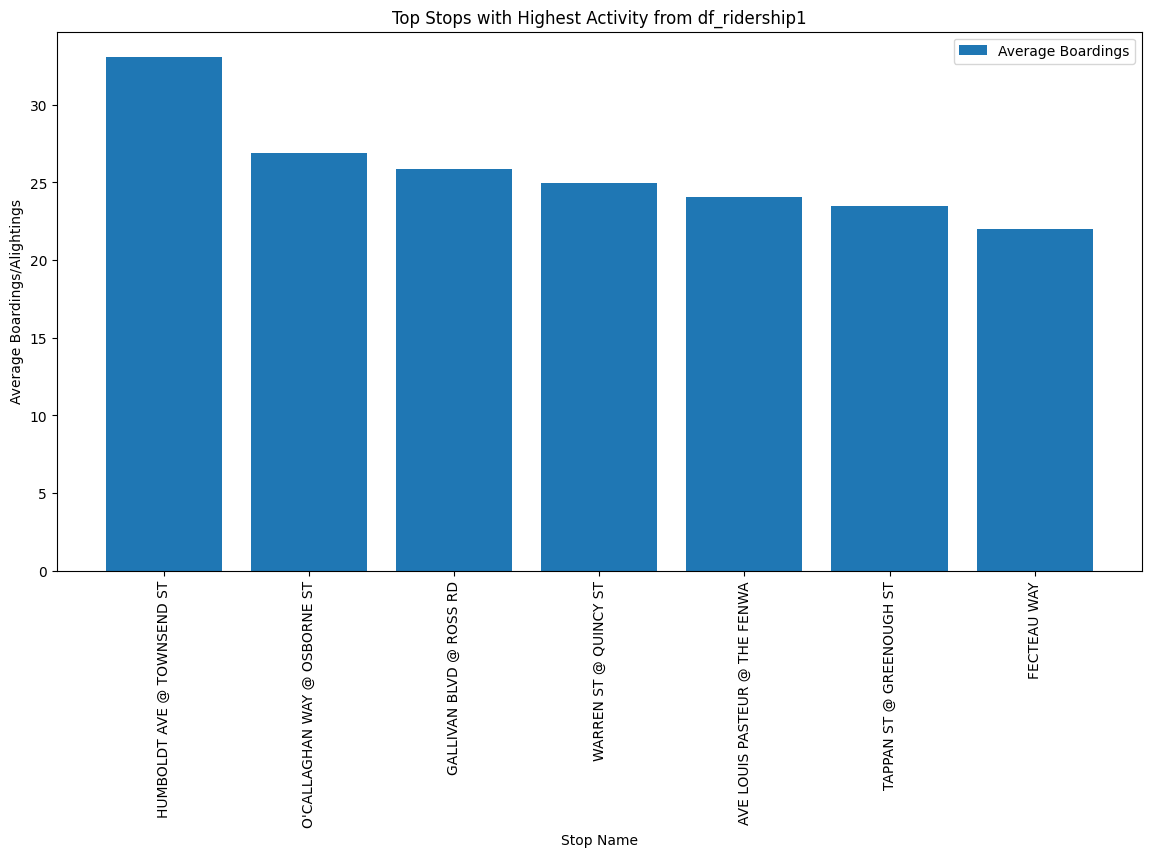

In [4]:
"""
I wanted to look into the stops with the most load and activity (boardings and alightings).
"""
# Analyzing df_ridership1 for load variations
load_variation_df1 = df_ridership1.groupby(['route_id', 'stop_id']).agg(
    average_load1=('load', 'mean'),
    average_boardings1=('boardings', 'mean'),
    average_alightings1=('alightings', 'mean')
).reset_index()

# Create mapping for stop names
stop_name_mapping = df_ridership1[['stop_id', 'stop_name']].drop_duplicates().set_index('stop_id')['stop_name'].to_dict()


# Identify the stops with the highest average load
high_load_stops_df1 = load_variation_df1.sort_values(by='average_load1', ascending=False).head(10)
high_activity_stops_df1 = load_variation_df1.sort_values(by=['average_boardings1', 'average_alightings1'], ascending=False).head(10)

# Apply mapping to high load stops dataframe
high_load_stops_df1['stop_name'] = high_load_stops_df1['stop_id'].map(stop_name_mapping)

# Apply mapping to high activity stops dataframe
high_activity_stops_df1['stop_name'] = high_activity_stops_df1['stop_id'].map(stop_name_mapping)

# Print out the top 10 stops for high load with stop names
print("Top 10 High Load Stops with Names from df_ridership1:")
print(high_load_stops_df1[['route_id', 'stop_id', 'stop_name', 'average_load1']])

# Print out the top 10 stops for high activity with stop names
print("\nTop 10 High Activity Stops with Names from df_ridership1:")
print(high_activity_stops_df1[['route_id', 'stop_id', 'stop_name', 'average_boardings1', 'average_alightings1']])


# Visualize high load stops from df_ridership1
plt.figure(figsize=(14, 7))
plt.bar(high_load_stops_df1['stop_name'].astype(str), high_load_stops_df1['average_load1'])
plt.xticks(rotation='vertical')
plt.title('Top Stops with Highest Average Load from df_ridership1')
plt.xlabel('Stop Name')
plt.ylabel('Average Load')
plt.show()

# Visualize high activity stops from df_ridership1
plt.figure(figsize=(14, 7))
plt.bar(high_activity_stops_df1['stop_name'].astype(str), high_activity_stops_df1['average_boardings1'], label='Average Boardings')
plt.xticks(rotation='vertical')
#plt.bar(high_activity_stops_df1['stop_id'].astype(str), high_activity_stops_df1['average_alightings1'], label='Average Alightings', alpha=0.7)
plt.title('Top Stops with Highest Activity from df_ridership1')
plt.xlabel('Stop Name')
plt.ylabel('Average Boardings/Alightings')
plt.legend()
plt.show()


#connect graphs together, 
# early insights? what dpes this tell you/ indicates NOT prove, 
# potential reasons why?, 
# steer in direction of what?
#difference between df1 and df2
#look into bus stop data and map these stops with neighborhoods next

/Users/nyx/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/xm/zvlqxssx0438vv_w32qrlddm0000gn/T/ipykernel_6453/3498768514.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  busroutes_with_neighborhoods['blockgr202'].fillna('Outside Towns', inplace=True)


Index(['objectid_left', 'stop_id', 'stop_name', 'town', 'town_id', 'geometry',
       'index_right', 'fid', 'objectid_right', 'blockgr202', 'shape_leng',
       'shape_area'],
      dtype='object')
   objectid_left  stop_id                         stop_name    town  town_id  \
0              1     3198  Newport Ave @ Furnace Brook Pwky  QUINCY      243   
1              2      618          Washington St @ Tobin Rd  BOSTON       35   
2              3     3392              Adams St @ Foster Ln  MILTON      189   
3              4     3034          Hancock St opp Butler Rd  QUINCY      243   
4              5     3299        Palmer St opp Brockton Ave  QUINCY      243   

                     geometry  index_right   fid  objectid_right  \
0  POINT (-71.01138 42.25738)          NaN   NaN             NaN   
1  POINT (-71.16123 42.25799)         23.0  23.0            24.0   
2  POINT (-71.03774 42.25759)          NaN   NaN             NaN   
3  POINT (-71.00813 42.25748)          NaN   NaN 

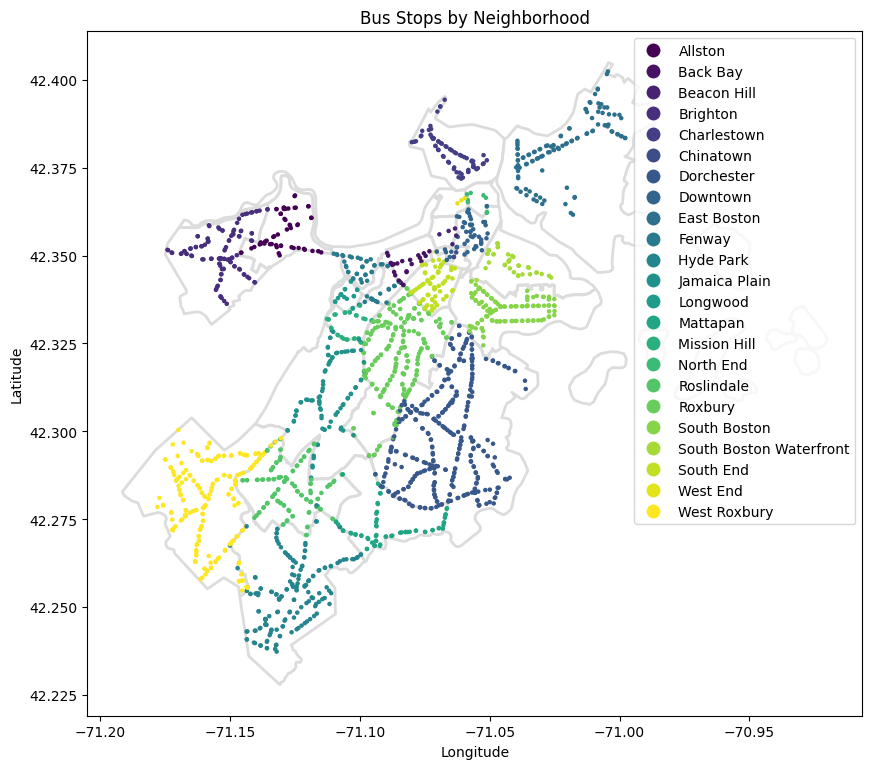

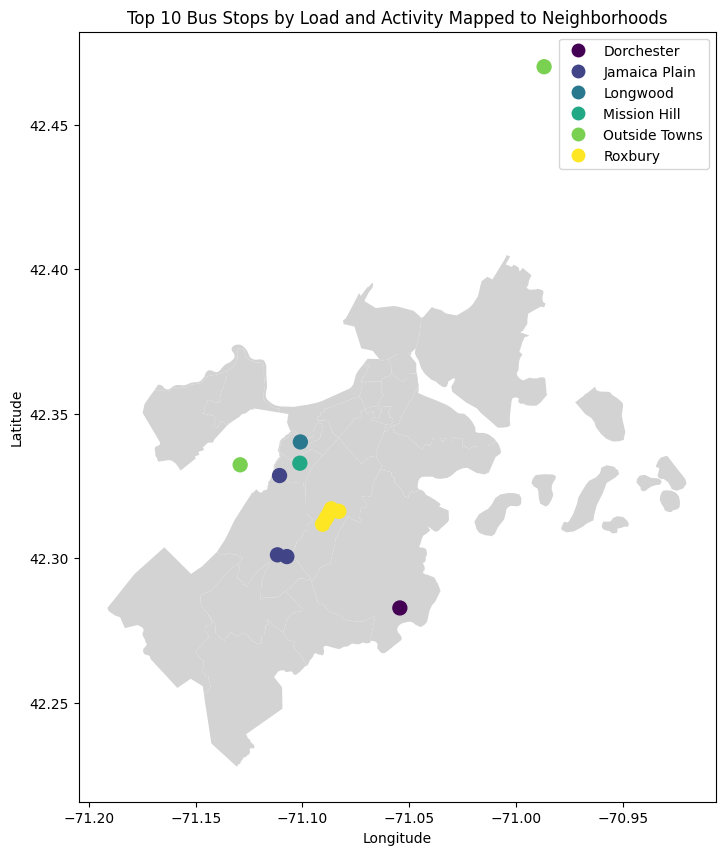

In [5]:
"""
I mapped all bus route stops to a map of Boston, and then took the top 10 highest load and activity stops,
combined them, and mapped them onto Boston.
"""
df_neighborhoods = df_neighborhoods.to_crs(df_busroutes_geo.crs)
busroutes_with_neighborhoods = gpd.sjoin(df_busroutes_geo, df_neighborhoods, how="left", op='intersects')
print(busroutes_with_neighborhoods.columns)
print(busroutes_with_neighborhoods.head())
print()
print(df_busroutes_geo.columns)
print(df_busroutes_geo.head())
# Summary of how many stops are in each neighborhood
neighborhood_summary = busroutes_with_neighborhoods['blockgr202'].value_counts()
print(neighborhood_summary)

busroutes_with_neighborhoods['blockgr202'].fillna('Outside Towns', inplace=True)
# Filter out entries labeled as 'Outside Towns'
inside_town_stops = busroutes_with_neighborhoods[busroutes_with_neighborhoods['blockgr202'] != 'Outside Towns']

 
fig, ax = plt.subplots(figsize=(10, 10))
df_neighborhoods.plot(ax=ax, color='none', edgecolor='gainsboro', linewidth=2)
inside_town_stops.plot(ax=ax, column='blockgr202', markersize=5, cmap='viridis', legend=True)
plt.title('Bus Stops by Neighborhood')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Filter for top ten stops by load and activity
top_stops = pd.concat([
    high_load_stops_df1['stop_id'],
    high_activity_stops_df1['stop_id'],
]).unique()

top_stops_with_neighborhoods = busroutes_with_neighborhoods[busroutes_with_neighborhoods['stop_id'].isin(top_stops)]


fig, ax = plt.subplots(figsize=(10, 10))
df_neighborhoods.plot(ax=ax, color='lightgray')
top_stops_with_neighborhoods.plot(ax=ax, column='blockgr202', markersize=100, cmap='viridis', legend=True)
plt.title('Top 10 Bus Stops by Load and Activity Mapped to Neighborhoods')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



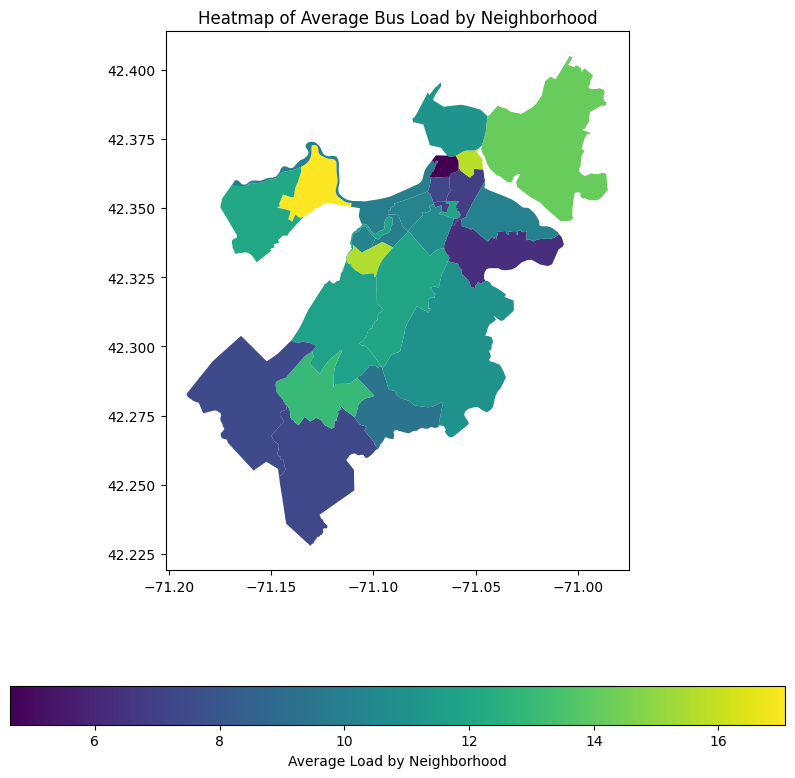

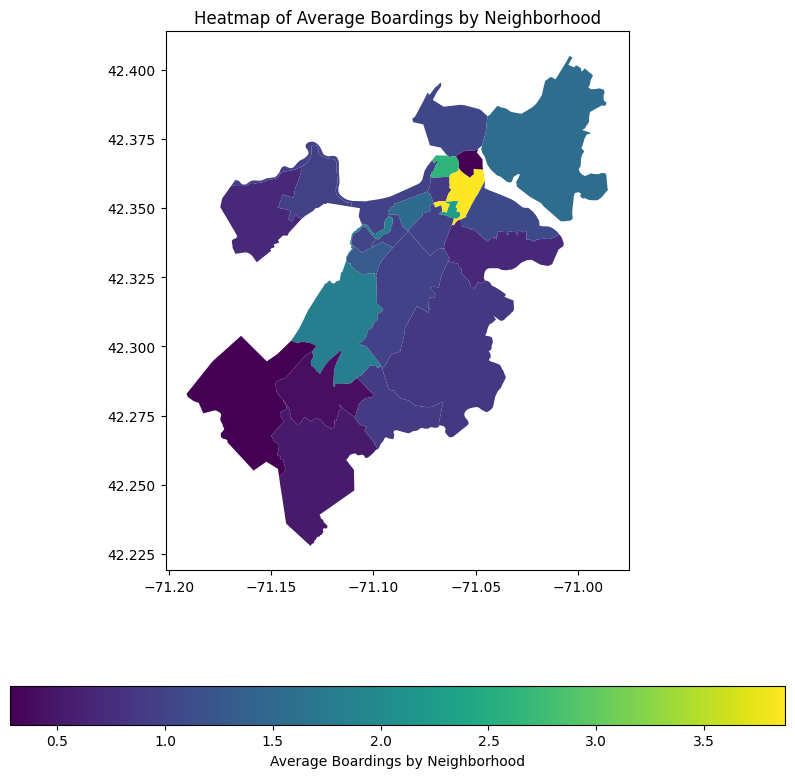

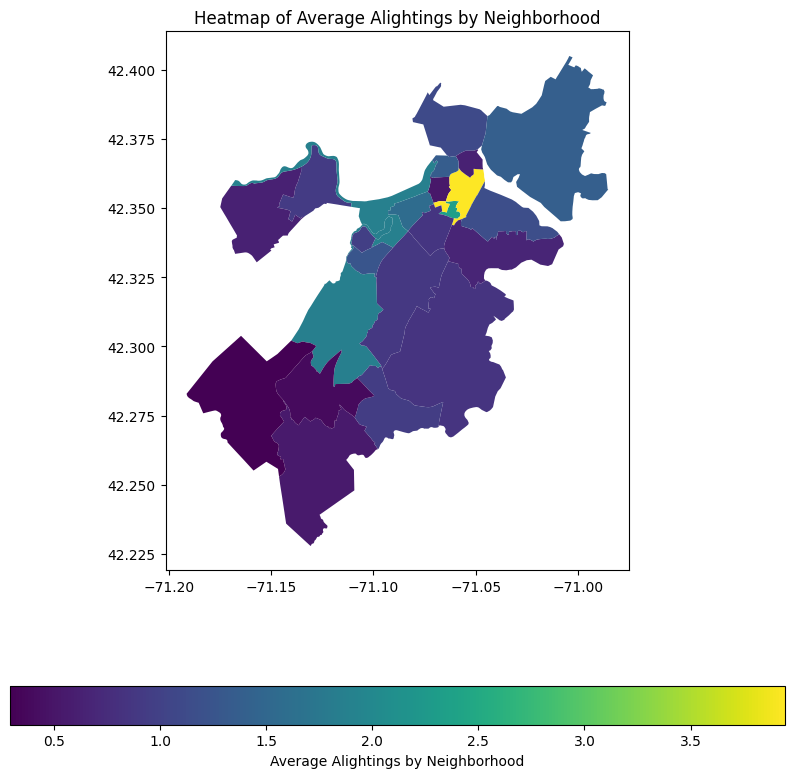

In [8]:
""" 
I decided to make a heat map to see for all bus stops, the neighborhoods with the highest load,
boardings and alightings. 

Highest Average Load: particularly high in Allston, with Mission Hill, North End, and East Boston following.
- This could suggest that these neighborhoods may be under high demand for public transportation due to either 
high population density, limited access to private transportation, or as a consequence of being key areas of 
transit that aggregate people from surrounding zones.
Lowest Average Load: particularly low in West End, with South Boston, Downtown and BEacon Hill following.
- This could suggest that these neighborhoods have an efficient match of service to demand,
lower demand, or that services are frequent enough to prevent buses from becoming crowded.

Boardings and alightings are particularly high in Downtown, which intuitively makes sense.
High boardings could indicate key transit hubs where many people begin their daily commute and 
high alighting areas might suggest where people commonly get off to reach their destinations (for work, school, more things to do, etc.).
The lowest boarding and alightings neighborhoods is in West Roxbury, Rosindale and Hyde Park. 
There is also notably low boardings in North End, and low alightings in North End, Beacon Hill, and Brighton.

Lower boarding neighborhoods can suggest less populated areas or neighborhoods that are not well served by bus routes.
Lower alighting neighborhoods can indicate areas with less attraction, a population that commutes outward for work or school,
or other modes of transportation being used to commute there.

There are limitations to these heatmap analysis, and more data needs to be collected to figure out potential reasons for these 
load, boarding, and alighting distributions.
"""
df_ridership1['stop_id'] = df_ridership1['stop_id'].astype(str)
busroutes_with_neighborhoods['stop_id'] = busroutes_with_neighborhoods['stop_id'].astype(str)

# Merge ridership data with bus routes and neighborhood data
ridership_with_neighborhoods = pd.merge(df_ridership1, busroutes_with_neighborhoods, on='stop_id', how='left')
# print(ridership_with_neighborhoods.head())
gdf = gpd.GeoDataFrame(ridership_with_neighborhoods, geometry='geometry')

# Aggregate average load by neighborhood
load_by_neighborhood = gdf.groupby('blockgr202')['load'].mean().reset_index()

neighborhoods = df_neighborhoods[['blockgr202', 'geometry']].drop_duplicates()
load_map = neighborhoods.merge(load_by_neighborhood, on='blockgr202', how='left')
load_map = gpd.GeoDataFrame(load_map)
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
load_map.plot(column='load', ax=ax, legend=True, cmap='viridis',
              legend_kwds={'label': "Average Load by Neighborhood",
                           'orientation': "horizontal"})
plt.title('Heatmap of Average Bus Load by Neighborhood')
plt.show()

activity_by_neighborhood = gdf.groupby('blockgr202')[['boardings', 'alightings']].mean().reset_index()

# Merge this data back with the neighborhood geometries
neighborhoods_activity = df_neighborhoods[['blockgr202', 'geometry']].drop_duplicates()
activity_map = neighborhoods_activity.merge(activity_by_neighborhood, on='blockgr202', how='left')

activity_map = gpd.GeoDataFrame(activity_map)

# Plotting the heatmap for average boardings
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
activity_map.plot(column='boardings', ax=ax, legend=True, cmap='viridis',
                  legend_kwds={'label': "Average Boardings by Neighborhood",
                               'orientation': "horizontal"})
plt.title('Heatmap of Average Boardings by Neighborhood')
plt.show()

# Plotting the heatmap for average alightings
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
activity_map.plot(column='alightings', ax=ax, legend=True, cmap='viridis',
                  legend_kwds={'label': "Average Alightings by Neighborhood",
                               'orientation': "horizontal"})
plt.title('Heatmap of Average Alightings by Neighborhood')
plt.show()

